In [34]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # for sentiment analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from datetime import datetime



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
product_file_path = r"full-00000-of-00001.parquet"
review_file_path = r"All_Beauty.jsonl"
product_df = pd.read_parquet(product_file_path)
df = pd.read_json(review_file_path, lines=True)

In [4]:
df.head(1) 

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True


In [5]:
product_df.head(1) 

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None


In [10]:
# merge Df and parent_df on 'parent_asin' , left join
merged_df = pd.merge(df, product_df, on='parent_asin', how='left', suffixes=('_review', '_product'))
merged_df.head(1)

,rating,title_review,text,images_review,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_product,videos,store,categories,details,bought_together,subtitle,author
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,...,"[If given the choice, weÕd leave most telltale...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Best Hair Product For Summer!', 'O...",HERBIVORE,[],"{""Hair Type"": ""Wavy"", ""Material Type Free"": ""D...",None,None,None


In [11]:
merged_df.columns

Index(['rating', 'title_review', 'text', 'images_review', 'asin',
       'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'title_product', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'images_product',
       'videos', 'store', 'categories', 'details', 'bought_together',
       'subtitle', 'author'],
      dtype='object')

## I. DATA Exploration 

Unveiling some trends about the product dataset


In [9]:
print (f"Shape of products dataset: {product_df.shape}")
print (f"Columns of products dataset: {product_df.columns}")

Shape of products dataset: (112590, 16)
Columns of products dataset: Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')


In [11]:
# Basic info about the dataset
print("Dataset Information:")
print(product_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       object 
 14  subtitle         0 non-null       object 
 15  author           0 non-null       object 
dtypes: float64(2), in

In [5]:
product_df[product_df['price'] == "None"].shape

print (f"the ratio of missing values in the price column is : {product_df[product_df['price'] == 'None'].shape[0] / product_df.shape[0] * 100:.2f}%")

the ratio of missing values in the price column is : 84.28%


In [6]:
# if price is None, replace it by na 
product_df['price'] = pd.to_numeric(product_df['price'], errors='coerce')


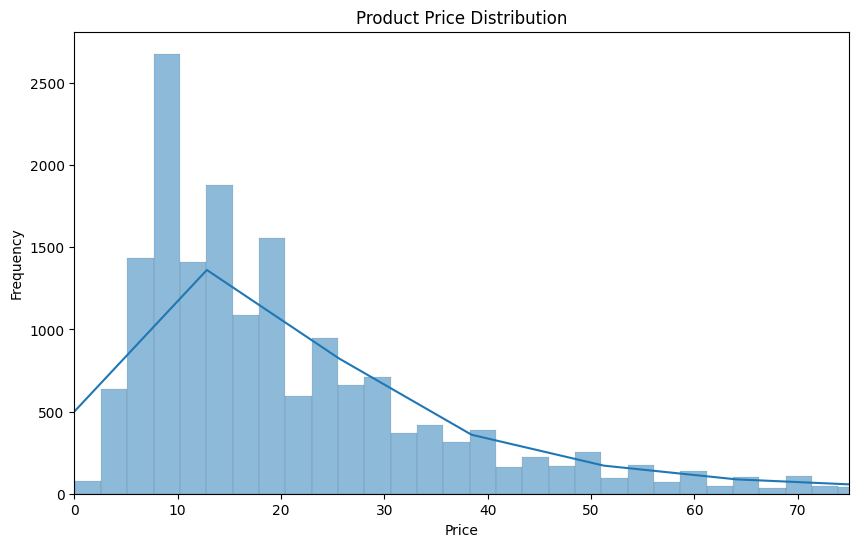

In [7]:
# plot product price distribution
plt.figure(figsize=(10, 6))
sns.histplot(product_df['price'].dropna(), bins=1000, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, product_df['price'].quantile(0.95))  # Limit x-axis to 95th percentile for better visualization
plt.show()

Note: many missing data for price and it tends to be left skewed for low prices, 
idk if imputation is possible given the volume of missing data , also no timestamp related to the products 

#### Reviews dataset

In [10]:
print (f"Shape of products dataset: {df.shape}")
print (f"Columns of products dataset: {df.columns}")
# Basic info about the dataset
print("Dataset Information:")
print(df.info())



Shape of products dataset: (701528, 10)
Columns of products dataset: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  7

Time range of reviews: 2000-11-01 04:24:18 to 2023-09-09 00:39:36.666000


C:\Users\FX506\AppData\Local\Temp\ipykernel_24572\3665911696.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(title='Number of Reviews Over Time', figsize=(12, 6))


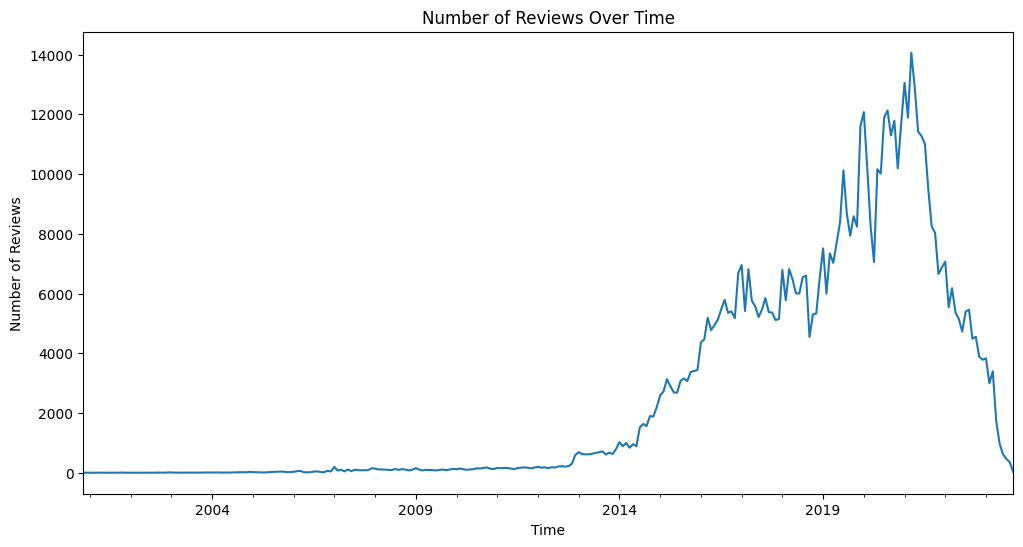

In [12]:
# print the time range of the reviews
print(f"Time range of reviews: {df['timestamp'].min()} to {df['timestamp'].max()}")
# plot reviews over time
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)
df.resample('M').size().plot(title='Number of Reviews Over Time', figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

Given the data availability, maybe we should focus on the period of time 2014 -> 2022

In [13]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
              rating   helpful_vote
count  701528.000000  701528.000000
mean        3.960245       0.923588
std         1.494452       5.471391
min         1.000000       0.000000
25%         3.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       1.000000
max         5.000000     646.000000


In [14]:
# check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
helpful_vote         0
verified_purchase    0
dtype: int64


No missing values, all good

In [31]:
# Convert arrays to strings
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(str)
        except:
            pass

In [32]:
# drop list-type columns for duplicate checking
print("Duplicate Rows:")
print(f"ratio of duplicate rows: {df.duplicated().sum()/len(df):.2%}")


Duplicate Rows:
ratio of duplicate rows: 1.04%


We should get rid of duplicates

In [17]:
unique_values = df.nunique()
print("Unique Values per Column:")
print(unique_values)

Unique Values per Column:
rating                    5
title                376394
text                 643629
images                58938
asin                 115709
parent_asin          112565
user_id              631986
helpful_vote            240
verified_purchase         2
dtype: int64


In [18]:
# i want to know if there are empty reviews
empty_reviews = df[df['text'].str.strip() == '']
empty_reviews.shape

(720, 9)

there are some empty text but there is always a title 

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", non_numerical_columns)

Numerical Columns:
 ['rating', 'helpful_vote']

Categorical Columns:
 ['title', 'text', 'images', 'asin', 'parent_asin', 'user_id']


In [20]:
# Display unique values for each categorical column
for col in ['rating', 'verified_purchase']:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"value counts: {df[col].value_counts()}")


Column: rating
Unique Values: [5 4 1 3 2]
value counts: rating
5    420726
1    102080
4     79381
3     56307
2     43034
Name: count, dtype: int64

Column: verified_purchase
Unique Values: [ True False]
value counts: verified_purchase
True     634969
False     66559
Name: count, dtype: int64


C:\Users\FX506\AppData\Local\Temp\ipykernel_24572\1934738080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


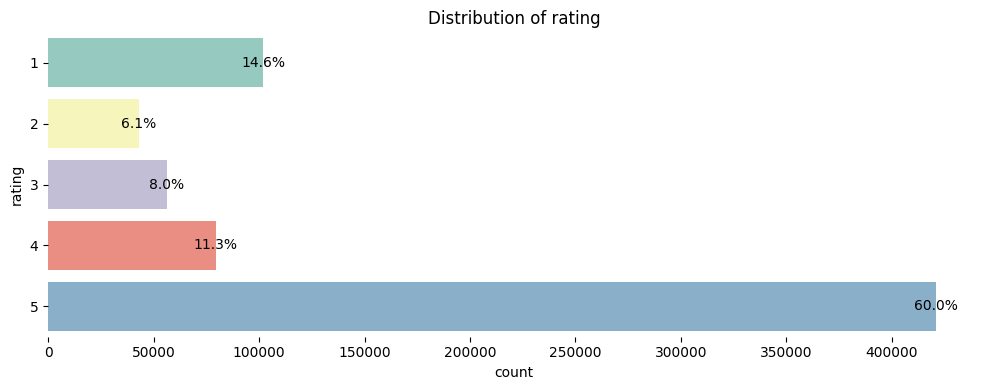

C:\Users\FX506\AppData\Local\Temp\ipykernel_24572\1934738080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


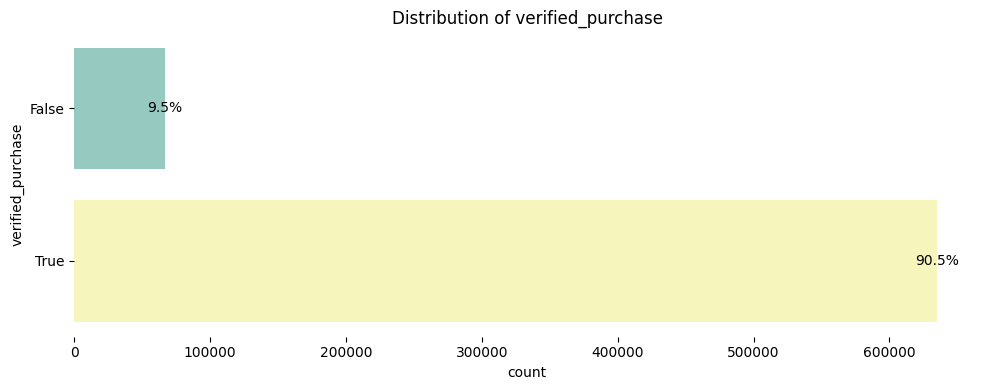

In [21]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))

    sns.countplot(y=column_name, data=data, palette='Set3')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        # annotate each bar with its percentage value
        width = p.get_width()
        total = len(data)
        percentage = f'{100 * width / total:.1f}%'
        plt.text(width + 0.1, p.get_y() + p.get_height() / 2, percentage, ha='center', va='center')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

categorical_features = ['rating', 'verified_purchase']
for feature in categorical_features:
    plot_categorical_distribution(feature, df)  

C:\Users\FX506\AppData\Local\Temp\ipykernel_19492\934521675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


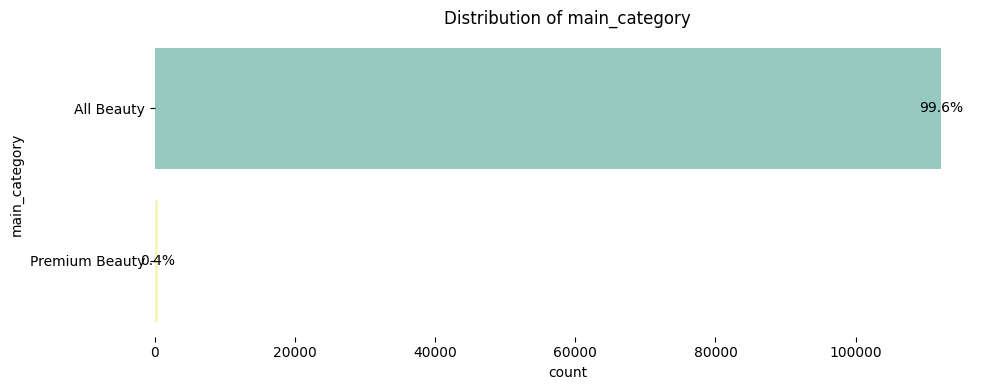

In [88]:
# do the same for categorical features in product_df
categorical_features = ['main_category']
for feature in categorical_features:
    plot_categorical_distribution(feature, product_df)
    

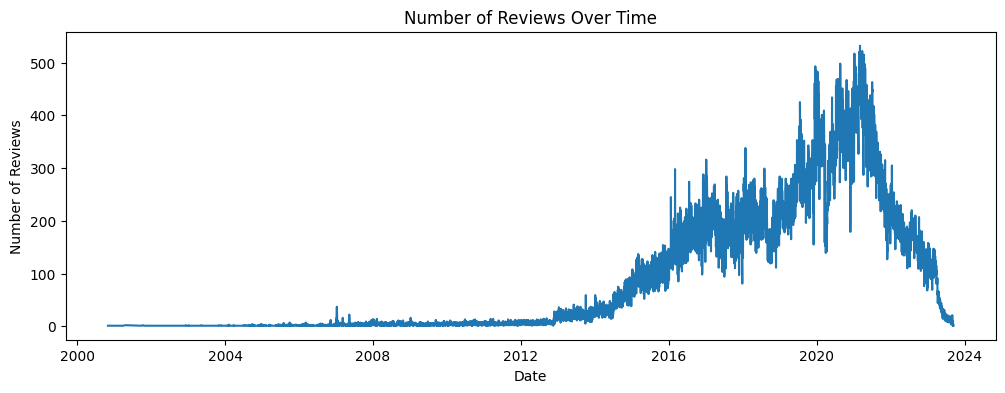

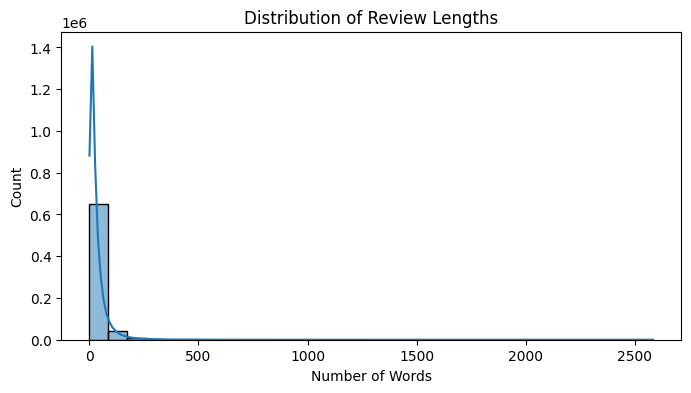

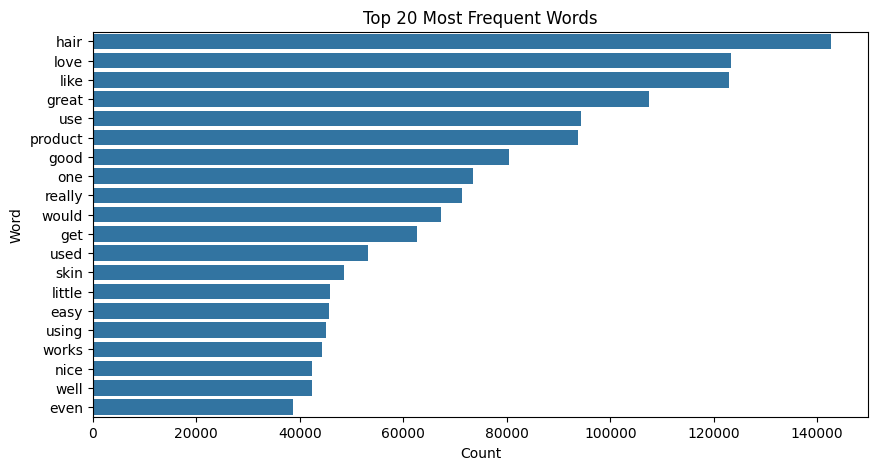

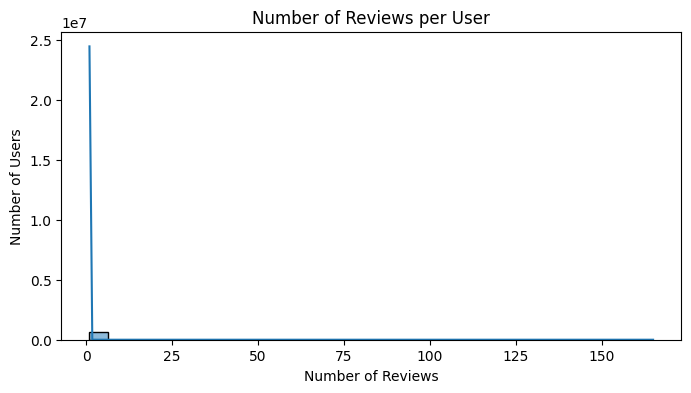

In [19]:
# 1️⃣ Time series of reviews
reviews_per_day = df.groupby(df['timestamp'].dt.date).size()
plt.figure(figsize=(12,4))
reviews_per_day.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

# 2️⃣ Review length
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# 3️⃣ Word frequency
all_words = ' '.join(df['text'].astype(str)).lower().split()
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]

word_counts = Counter(filtered_words)
most_common = word_counts.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# 4️⃣ Reviewer activity
reviews_per_user = df.groupby('user_id').size()
plt.figure(figsize=(8,4))
sns.histplot(reviews_per_user, bins=30, kde=True)
plt.title('Number of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()


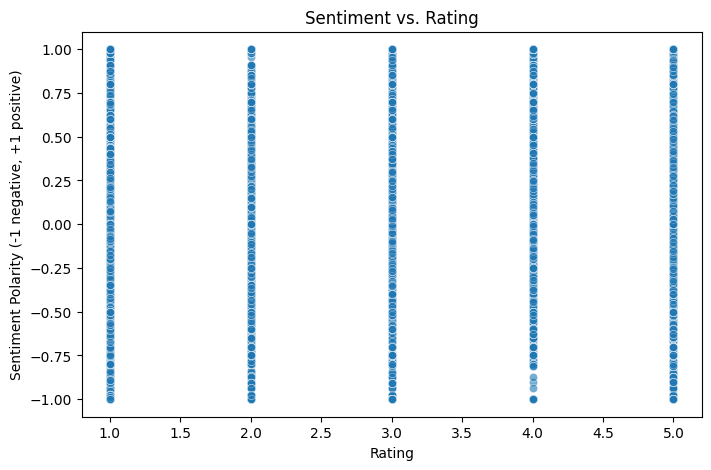

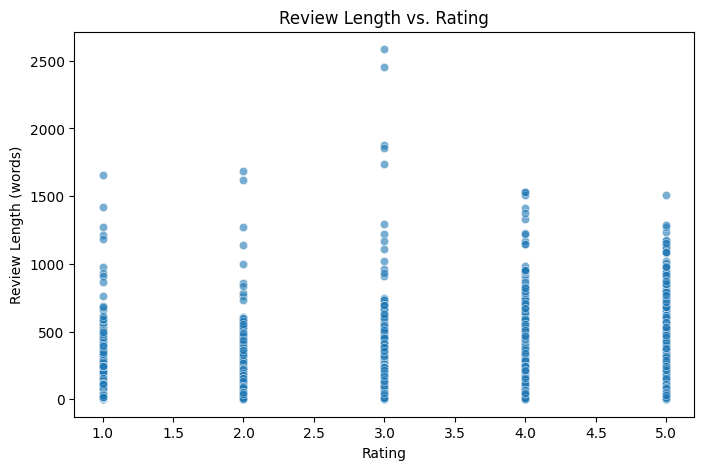

In [20]:
# 1️⃣ Sentiment polarity
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 2️⃣ Scatter plot: sentiment vs. rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='rating', y='sentiment', alpha=0.6)
plt.title('Sentiment vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity (-1 negative, +1 positive)')
plt.show()

# 3️⃣ Scatter plot: review length vs. rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='rating', y='review_length', alpha=0.6)
plt.title('Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')
plt.show()


### Data processing

In [ ]:
# drop  duplicates 
df = df.drop_duplicates ( keep="first")
# keep verified reviews only
df = df[df['verified_purchase'] == True]



In [22]:
# drop the column images
df.drop(columns=['images'], inplace=True)

## Feature Engineering 

In [ ]:
## add KPIs maybe ?

## Fake reviews Filtering

In [82]:
#print a review that contains the word "great great"

df[df['text'].str.contains("great great", na=False)]['text'].values

array(['Impressed with ImPress nails. Easy to apply. Great staying power. They looked great great for about two weeks, and believe me, I’m rough on my hands and nails. Great fix until I can go back to my nail tech!',
       'Looks great great blend with my own hair',
       "They're awesome they work great great seller",
       'Great great great!! This product has such great pigment!! Really makes my eyes pop!!',
       'This is a great great product for a great great price! By the time of this writing, I am already on my second bottle. I could not recommend this more. This is a perfect product on days when you don’t want to put any make up on but need a little something. And I always put it under my number seven foundation! Can’t go wrong with this one!',
       'Great great great !! That’s all I can say !!!',
       "I am so tired of 1. waiting a month for something to ship overseas and 2. it being too expensive to return/ship back if I dont like It.<br />I have wasted close to a th

### Rule-based / heuristic approach

In [88]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 2. DATA PREPROCESSING ---------- #

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"<br\s*/?>", " ", text)       # replace br with space
    text = re.sub(r"[^a-z\s]", "", text)         # keep only letters
    text = re.sub(r"\s+", " ", text).strip()
    return text

def preprocess_reviews(df):
    df["review_full"] = (df["title"].fillna("") + " " + df["text"].fillna("")).str.strip()
    df["review_clean"] = df["review_full"].apply(clean_text)
    df["tokens"] = df["review_clean"].apply(lambda x: word_tokenize(x) if x else [])
    df = df.dropna(subset=["asin", "rating"])
    df["parent_asin"].fillna("UNKNOWN", inplace=True)
    df["user_id"].fillna("UNKNOWN", inplace=True)
    df["review_length"] = df["review_clean"].str.len()
    df["word_count"] = df["tokens"].apply(len)

    # df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    return df

# ---------- 3. FAKE REVIEW DETECTION ---------- #

def detect_fake_reviews(df):
    # --- Content-based ---
    df["review_length"] = df["review_clean"].str.len()
    df["word_count"] = df["tokens"].apply(len)

    # Flag short, extremely long, or repetitive reviews
    df["content_flag"] = (
        # (df["word_count"] < 5) | i removed this condition to keep short reviews 
        (df["word_count"] > 500) | # extremely long reviews tend to be suspicious
        df["review_clean"].str.contains(r"(great great|buy buy)", regex=True)
    )

    # Flag reviews with excessive technical jargon
    technical_words = ["mg", "ml", "chemical", "compound", "pharmaceutical", "extract", "formula", "study"]
    df["tech_flag"] = df["review_clean"].apply(lambda x: any(w in x for w in technical_words))
    df["content_flag"] |= df["tech_flag"]

    # excessive use of exclamation marks
    df["exclamation_flag"] = df["review_clean"].str.count(r"!") > 5
    df["content_flag"] |= df["exclamation_flag"]    

    # check if the rating matches sentiment
    df["sentiment"] = df["review_clean"].apply(lambda x: TextBlob(x).sentiment.polarity if x else 0)
    df["sentiment_flag"] = (
        ((df["rating"] >= 4) & (df["sentiment"] < 0)) |
        ((df["rating"] <= 2) & (df["sentiment"] > 0))
    )   
    # --- Behavior-based ---
    user_review_counts = df.groupby("user_id")["asin"].count()
    suspicious_users = user_review_counts[user_review_counts > 100].index
    df["behavior_flag"] = df["user_id"].isin(suspicious_users)

    user_rating_var = df.groupby("user_id")["rating"].nunique()
    mono_rating_users = user_rating_var[user_rating_var == 1].index
    df["behavior_flag"] |= df["user_id"].isin(mono_rating_users)

    # --- Trust signals ---
    df["unverified_flag"] = ~df["verified_purchase"].astype(bool)
    df["no_helpful_flag"] = (df["helpful_vote"].fillna(0) == 0)
    df["no_image_flag"] = df["images"].isna()

    # Combine flags
    df["fake_flag"] = (
        df["content_flag"] |
        df["behavior_flag"] |
        (df["unverified_flag"] & df["no_helpful_flag"] & df["no_image_flag"])
    )
    return df



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
df = preprocess_reviews(df)


C:\Users\FX506\AppData\Local\Temp\ipykernel_32772\525151560.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["parent_asin"].fillna("UNKNOWN", inplace=True)
C:\Users\FX506\AppData\Local\Temp\ipykernel_32772\525151560.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

#### 1. Content-based trends

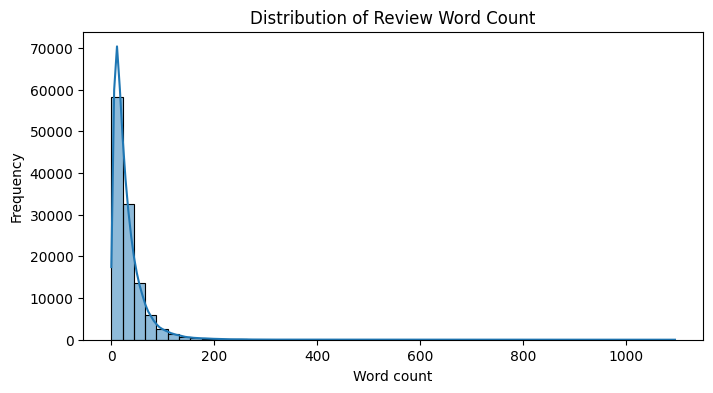

In [90]:
plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Review Word Count")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()


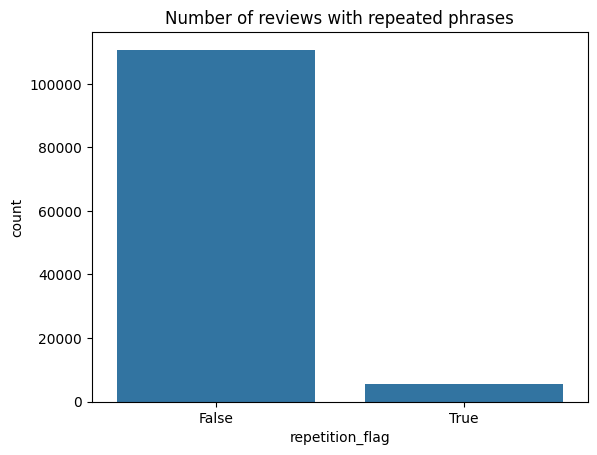

In [94]:
from collections import Counter
#A simple way to detect repetition in a review is to check for repeated consecutive words or repeated n-grams.
def has_repetition(text, n=2, threshold=3):
    """
    Detect if a text contains repeated n-grams.
    
    Parameters:
    - text: string
    - n: size of n-grams (default bigrams)
    - threshold: number of repetitions to flag
    
    Returns:
    - True if repetition detected, else False
    """
    tokens = text.split()
    if len(tokens) < n:
        return False
    
    # Build n-grams
    ngrams = zip(*[tokens[i:] for i in range(n)])
    ngrams = [" ".join(gram) for gram in ngrams]
    
    # Count n-grams
    counts = Counter(ngrams)
    
    # Flag if any n-gram repeats >= threshold
    return any(count >= threshold for count in counts.values())


df['repetition_flag'] = df['review_clean'].apply(has_repetition)
sns.countplot(x='repetition_flag', data=df)
plt.title("Number of reviews with repeated phrases")
plt.show()


Sentiment vs rating

TextBlob detects polarity using a lexicon-based approach:

Tokenizes text and tags parts of speech.

Looks up words in a sentiment lexicon (e.g., “love” = +0.5, “terrible” = -0.8).

Handles negations (“not good”) and intensifiers (“very good”).

Aggregates word scores to give an overall polarity between -1 (negative) and +1 (positive).

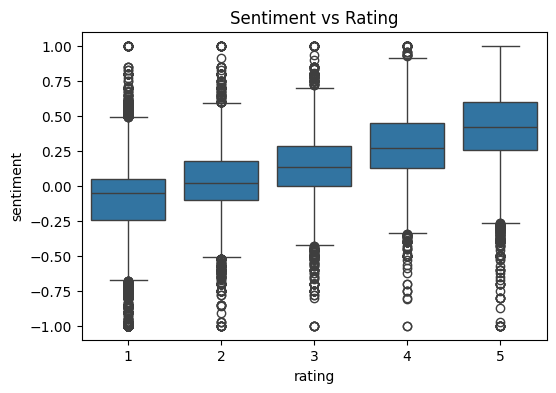

In [95]:
from textblob import TextBlob

df['sentiment'] = df['review_clean'].apply(lambda x: TextBlob(x).sentiment.polarity if x else 0)
plt.figure(figsize=(6,4))
sns.boxplot(x='rating', y='sentiment', data=df)
plt.title("Sentiment vs Rating")
plt.show()


    2. Behavior-based trends

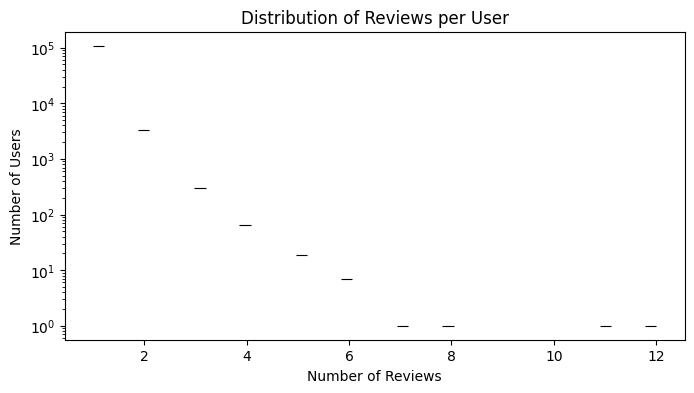

In [ ]:
# TO DO:  Maybe it's better to do this for a specific product ( asin )

user_counts = df.groupby("user_id")["asin"].count()
plt.figure(figsize=(8,4))
sns.histplot(user_counts, bins=50, log_scale=(False, True))
plt.title("Distribution of Reviews per User")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.show()


In [99]:
# Make sure index is datetime
df.index = pd.to_datetime(df.index)

# Sort by user and timestamp
df = df.sort_values(['user_id', df.index.name])

# Count reviews in a rolling 7-day window per user
df['reviews_last_7d'] = df.groupby('user_id')['user_id'].transform(
    lambda x: x.rolling('7d').count()
)


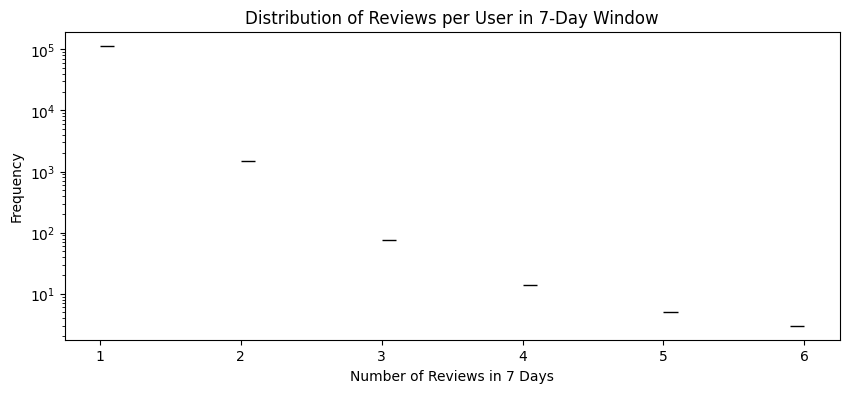

In [100]:
plt.figure(figsize=(10,4))
sns.histplot(df['reviews_last_7d'], bins=50, log_scale=(False, True))
plt.title("Distribution of Reviews per User in 7-Day Window")
plt.xlabel("Number of Reviews in 7 Days")
plt.ylabel("Frequency")
plt.show()


In [ ]:
threshold = 5  # tweak based on histogram
df['high_activity_flag'] = df['reviews_last_7d'] > threshold



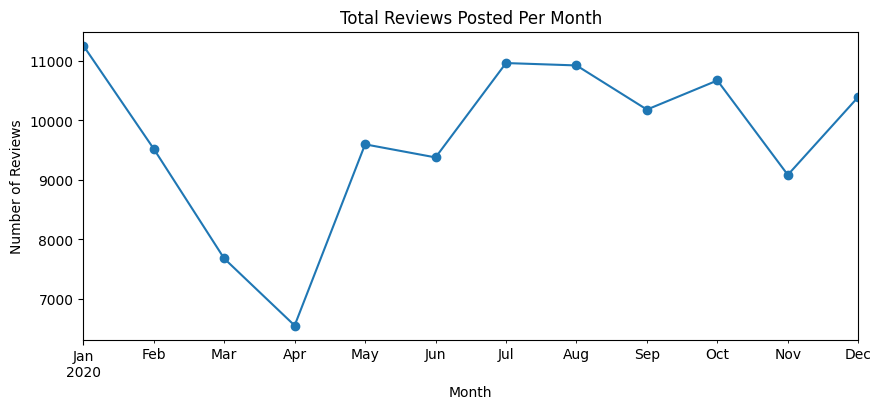

In [106]:
# timestamp is in the index
df.index = pd.to_datetime(df.index)
reviews_over_time = df.groupby(df.index.to_period("M"))["user_id"].count()
plt.figure(figsize=(10,4))
reviews_over_time.plot(marker='o')
plt.title("Total Reviews Posted Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()


TO DO : define the rules to classify the reviews into fake or not BASED ON THE ANALYSIS OF THE GRAPHS 

### Clustering / outliers detection
Since our data is unlabeled, we're opting for an unsupervised approach. 

##### 1. Feature Representation



    a. TF-IDF

In [63]:
# keep df for the year 2020 only
df.set_index('timestamp', inplace=True) 
df = df[df.index.year == 2020]

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df['review_clean'])


    b. Sentence Embeddings 
Sentence embeddings capture meaning, not just word overlap — good for spotting templated or repetitive content.

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X_emb = model.encode(df['review_clean'].reset_index(drop=True), show_progress_bar=True)


##### 2. Clustering Algorithms

    a. KMeans

In [66]:
from sklearn.cluster import KMeans

k = 10  # start with 10 clusters, adjust
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)  # or X_tfidf


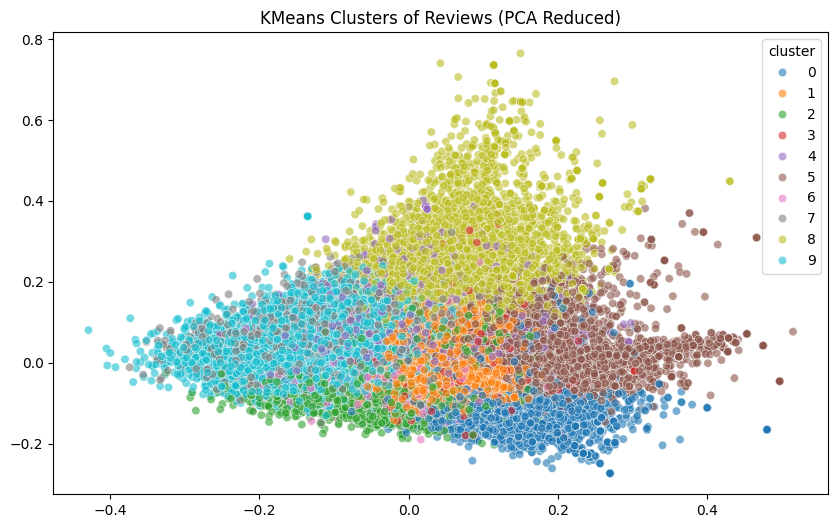

In [67]:
# Visualize clusters with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())  # or X_emb    
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='tab10', legend='full', alpha=0.6)
plt.title('KMeans Clusters of Reviews (PCA Reduced)')   
plt.show()

    b. DBSCAN

Density-based, good for detecting small “outlier” clusters (likely fake reviews).

In [78]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # metric='cosine' for embeddings
df['cluster'] = dbscan.fit_predict(X_tfidf)  # or X_emb


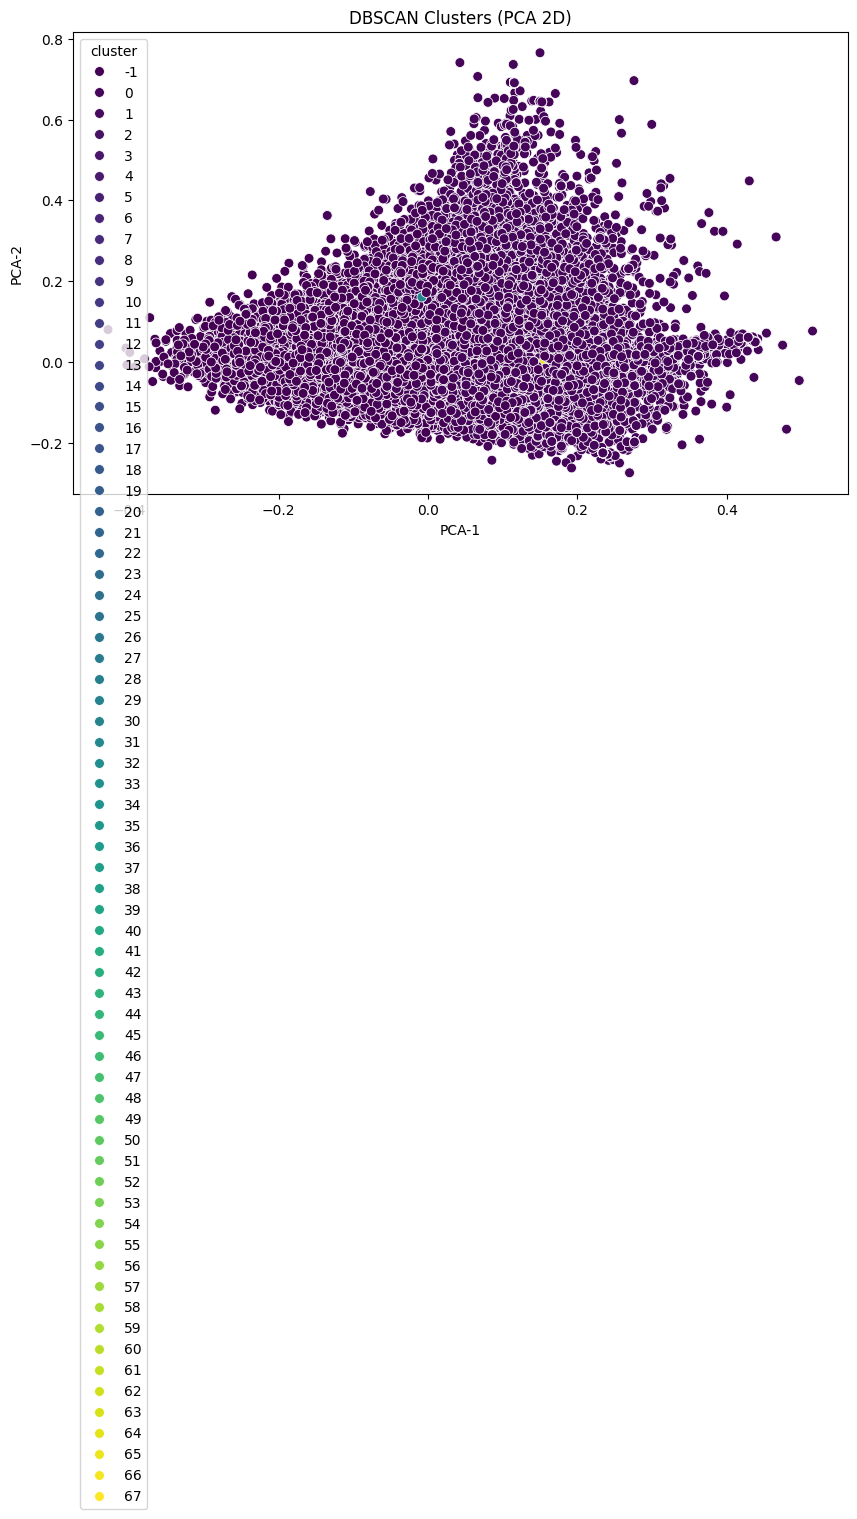

In [79]:
#visualise DSCAN clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette="viridis", legend="full", s=50)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

    c. HDBSCAN
Better than DBSCAN for variable-density clusters:

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
df['cluster'] = clusterer.fit_predict(X_emb)


TO DO:
 ANALYSE THE DIFFERENT CLUSTERS DEPENDING ON THE METHOD AND SEE IF SOME CLUSTERS EMERGE 

## Basic classification task

In [103]:
def label_from_rating(r):
    if r >= 4:
        return "positive"
    elif r <= 2:
        return "negative"
    else:
        return "neutral"

df["label"] = df["rating"].apply(label_from_rating)


C:\Users\FX506\AppData\Local\Temp\ipykernel_19492\2259978777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["rating"].apply(label_from_rating)


note: the problem with this labeling is that it assumes the ratings are correct

In [104]:
df["review"] = df["title"].fillna("") + " " + df["text"].fillna("")


C:\Users\FX506\AppData\Local\Temp\ipykernel_19492\4112595660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["title"].fillna("") + " " + df["text"].fillna("")


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["label"], test_size=0.2, random_state=42)

# Vectorize text
vec = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.78      0.80      0.79     28547
     neutral       0.47      0.15      0.23     11151
    positive       0.90      0.96      0.93     99153

    accuracy                           0.87    138851
   macro avg       0.72      0.64      0.65    138851
weighted avg       0.84      0.87      0.85    138851



Text(0.5, 1.0, 'Top 10 parent_asin distribution')

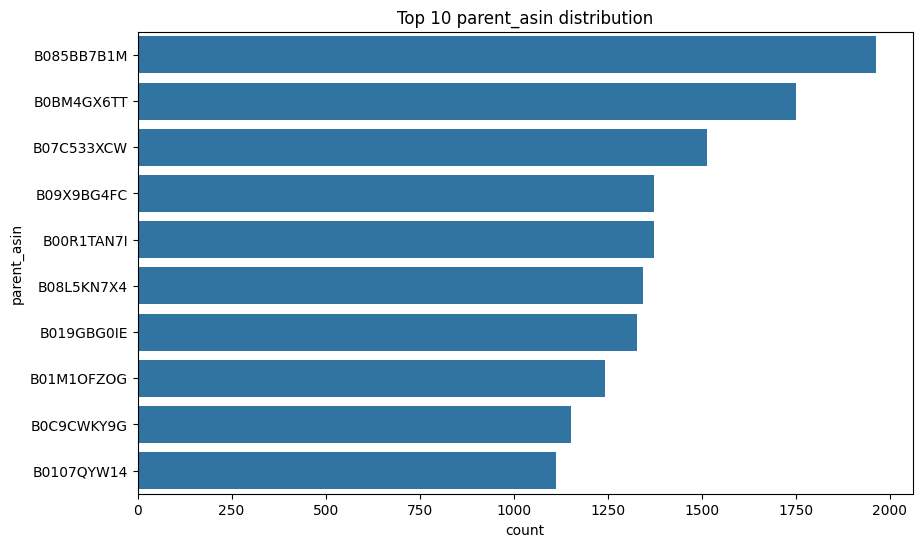

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='parent_asin', data=merged_df, order=merged_df['parent_asin'].value_counts().index[:10])
plt.title('Top 10 parent_asin distribution')